In [1]:
import pandas as pd

import CalculatedFieldSubroutines as cfs

import matplotlib.pyplot as plt

In [2]:
gmID = '3a7dc9a6-f042-11ee-b974-fb353e7798cd'

topic = '_apollo_perception_traffic_light'

In [3]:
df = pd.read_csv( f'/home/rcoldren_linux/Desktop/TDMprivate/data/{gmID}/{topic}/{gmID}{topic}.csv' )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   groupMetadataID                       4317 non-null   object 
 1   time                                  4317 non-null   int64  
 2   cameraId                              4317 non-null   object 
 3   containLights                         0 non-null      float64
 4   trafficLight                          0 non-null      float64
 5   trafficLightDebug.distanceToStopLine  0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 202.5+ KB


In [5]:
gmIDs = cfs.list_gmIDs()

In [6]:
topics = cfs.list_topics()

In [7]:
print( topics )

['/apollo/canbus/chassis', '/apollo/drive/event', '/apollo/sensor/gnss/best/pose', '/apollo/perception/traffic/light']


In [8]:
df = cfs.retrieve_gmID_topic( '3a7dc9a6-f042-11ee-b974-fb353e7798cd', '_apollo_perception_traffic_light' )

In [9]:
df = cfs.retrieve_gmID_topic( gmIDs[ 100 ], '/apollo/canbus/chassis' )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54331 entries, 0 to 54330
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brakePercentage     54331 non-null  float64
 1   groupMetadataID     54331 non-null  object 
 2   drivingMode         54331 non-null  object 
 3   speedMps            54331 non-null  float64
 4   time                54331 non-null  int64  
 5   throttlePercentage  54331 non-null  float64
 6   steeringPercentage  54331 non-null  float64
 7   signal.turnSignal   54331 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [11]:
df.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.16,1703610824578611932,29.6,-0.763957,TURN_NONE
1,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.23,1703610824614414394,29.6,-0.734574,TURN_NONE
2,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.23,1703610824644230970,29.6,-0.734574,TURN_NONE
3,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.30,1703610824677549315,29.6,-0.734574,TURN_NONE
4,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.32,1703610824709695604,29.6,-0.714985,TURN_NONE


In [12]:
df = df.sort_values( 'time' )

In [13]:
cfs.NormalizedTime( df )

In [14]:
cfs.DeltaTime( df )

In [15]:
df.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,NormalizedTime,DeltaTime
0,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.16,1703610824578611932,29.6,-0.763957,TURN_NONE,0,35802462
1,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.23,1703610824614414394,29.6,-0.734574,TURN_NONE,35802462,35802462
2,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.23,1703610824644230970,29.6,-0.734574,TURN_NONE,65619038,29816576
3,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.30,1703610824677549315,29.6,-0.734574,TURN_NONE,98937383,33318345
4,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.32,1703610824709695604,29.6,-0.714985,TURN_NONE,131083672,32146289


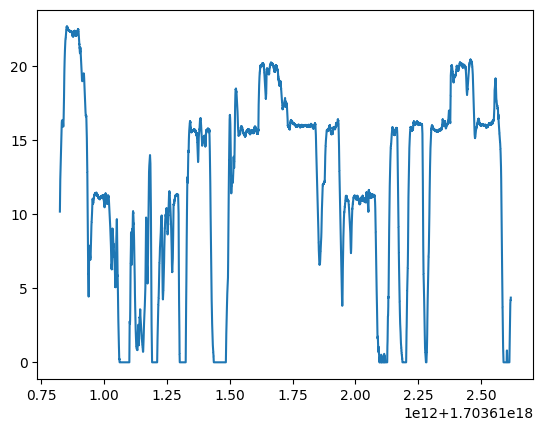

In [46]:
plt.plot( df[ 'time' ], df[ 'speedMps' ] )

plt.show()

In [47]:
cfs.BinaryDrivingMode( df )

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54331 entries, 0 to 54330
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brakePercentage     54331 non-null  float64
 1   groupMetadataID     54331 non-null  object 
 2   drivingMode         54331 non-null  object 
 3   speedMps            54331 non-null  float64
 4   time                54331 non-null  int64  
 5   throttlePercentage  54331 non-null  float64
 6   steeringPercentage  54331 non-null  float64
 7   signal.turnSignal   54331 non-null  object 
 8   BinaryDrivingMode   54331 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 3.7+ MB


In [49]:
df.head( 100 )

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,BinaryDrivingMode
0,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.16,1703610824578611932,29.6,-0.763957,TURN_NONE,0
1,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.23,1703610824614414394,29.6,-0.734574,TURN_NONE,0
2,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.23,1703610824644230970,29.6,-0.734574,TURN_NONE,0
3,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.30,1703610824677549315,29.6,-0.734574,TURN_NONE,0
4,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,10.32,1703610824709695604,29.6,-0.714985,TURN_NONE,0
...,...,...,...,...,...,...,...,...,...
95,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,13.67,1703610827712425174,25.2,2.409403,TURN_NONE,0
96,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,13.68,1703610827746497399,25.2,2.477963,TURN_NONE,0
97,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,13.71,1703610827779891095,25.2,2.556317,TURN_NONE,0
98,0.0,04151804-ec20-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,13.71,1703610827811960840,25.2,2.595495,TURN_NONE,0


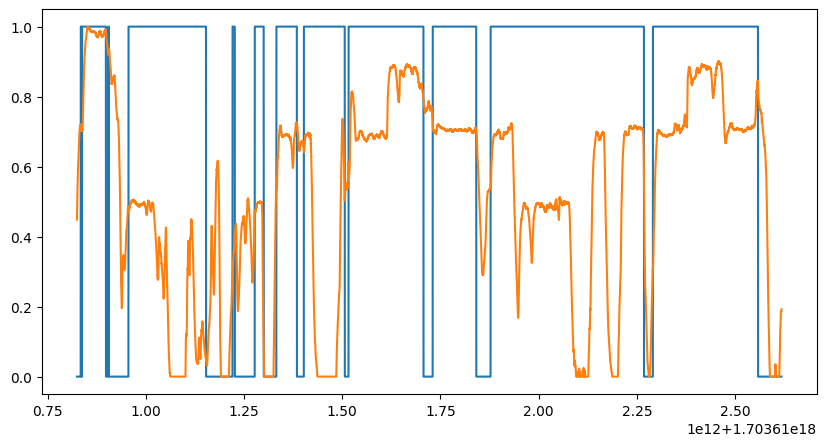

In [56]:
plt.figure( figsize = ( 10, 5 ) )

plt.plot( df[ 'time' ], df[ 'BinaryDrivingMode' ] )

plt.plot( df[ 'time' ], df[ 'speedMps' ] / max( df[ 'speedMps' ] ) )

plt.show()

In [51]:
cfs.TernaryDrivingModeTransition( df )

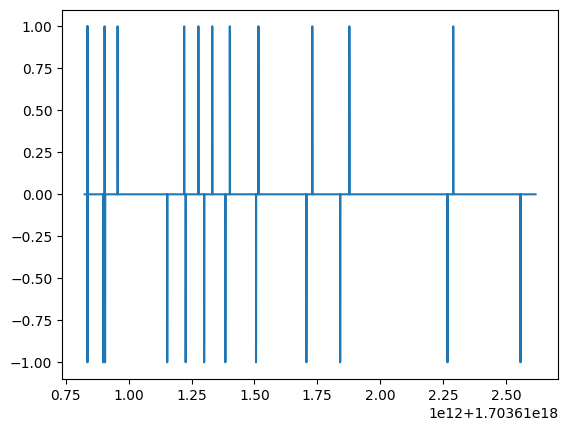

In [52]:
plt.plot( df[ 'time' ], df[ 'TernaryDrivingModeTransition' ] )

plt.show()